##Libraries Installation and Import

In [1]:
!pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.7.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 665.5 MB 376 kB/s
     |████████████████████████████████| 1.3 MB 11.2 MB/s 
     |████████████████████████████████| 463 kB 3.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 27.3 MB/s 


In [2]:
!pip install segmentation_models
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.8 MB/s 
Segmentation Models: using `keras` framework.


'tf.keras'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [ ]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.1.2.30
Uninstalling opencv-python-headless-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
Proceed (y/n)? y
  Successfully uninstalled opencv-python-headless-4.1.2.30


In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 109.9 MB/s 


In [6]:
import os
import numpy as np
import cv2
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from tensorflow.keras.optimizers import Adam, Nadam
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import sys
import zipfile

##Unzipping data

In [ ]:
import sys
import zipfile

#Unzipping the dataset
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CV/Notebooks/assign3/A3_Dataset.zip", "r")
zip_ref.extractall('/content/drive/MyDrive/CV/Notebooks/assign3')
zip_ref.close()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-08f1307ec07e>", line 5, in <module>
    zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CV/Notebooks/assign3/A3_Dataset.zip", "r")
  File "/usr/lib/python3.7/zipfile.py", line 1258, in __init__
    self._RealGetContents()
  File "/usr/lib/python3.7/zipfile.py", line 1344, in _RealGetContents
    data = fp.read(size_cd)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

KeyboardInterrupt: ignored

## Paths and Data Loading

In [7]:
files_path = "/content/drive/MyDrive/CV/Notebooks/assign3/A3_Dataset/dataset1"

test_label_dir=os.path.join(files_path+'/annotations_prepped_test')
train_image_dir=os.path.join(files_path+'/images_prepped_train')
train_label_dir=os.path.join(files_path+'/annotations_prepped_train')
test_image_dir=os.path.join(files_path+'/images_prepped_test')

Count of Data...

In [8]:
#Total Number
print('Total Training Images: ',len(os.listdir(train_image_dir)))
print('Total Training Grouth Truth: ',len(os.listdir(train_label_dir)))
print('Total Test Images: ',len(os.listdir(test_image_dir)))
print('Total Grouth Truth: ',len(os.listdir(test_label_dir)))

Total Training Images:  367
Total Training Grouth Truth:  367
Total Test Images:  101
Total Grouth Truth:  101


Getting path of the images...

In [9]:
train_image = [os.path.join(train_image_dir,fname) for fname in os.listdir(train_image_dir)[:]]
#print(train_image)
train_label = [os.path.join(train_label_dir,fname) for fname in os.listdir(train_label_dir)[:]]

test_image = [os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]]
test_label = [os.path.join(test_label_dir,fname) for fname in os.listdir(test_label_dir)[:]]

Loading the Data...

In [10]:
image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

In [11]:
print('Train Images Shape: ',train_images.shape)
print('Train labels Shape: ',train_labels.shape)
print('Test Images Shape: ',test_images.shape)
print('Test labels Shape: ',test_labels.shape)

Train Images Shape:  (367, 224, 224, 3)
Train labels Shape:  (367, 224, 224)
Test Images Shape:  (101, 224, 224, 3)
Test labels Shape:  (101, 224, 224)


Displaying the loaded data...with sample visualizations

<function matplotlib.pyplot.show>

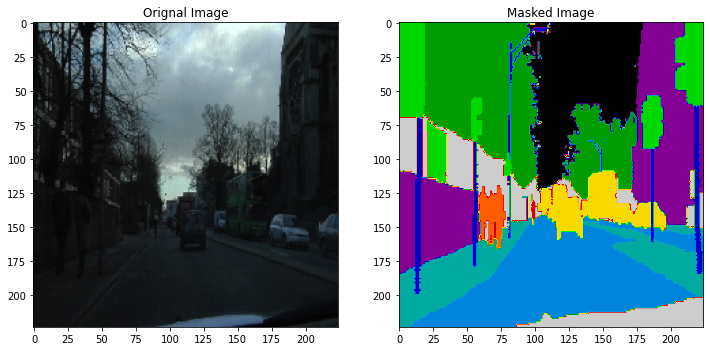

In [12]:
plt.figure(figsize = (12,12))

plt.subplot(1, 2, 1)
plt.imshow(train_images[15], cmap='gray')
plt.title('Orignal Image')

plt.subplot(1, 2, 2)
plt.imshow(train_labels[15], cmap='nipy_spectral')
plt.title('Masked Image')
plt.show

In [13]:
image = train_images[15]
im_true = train_labels[15]

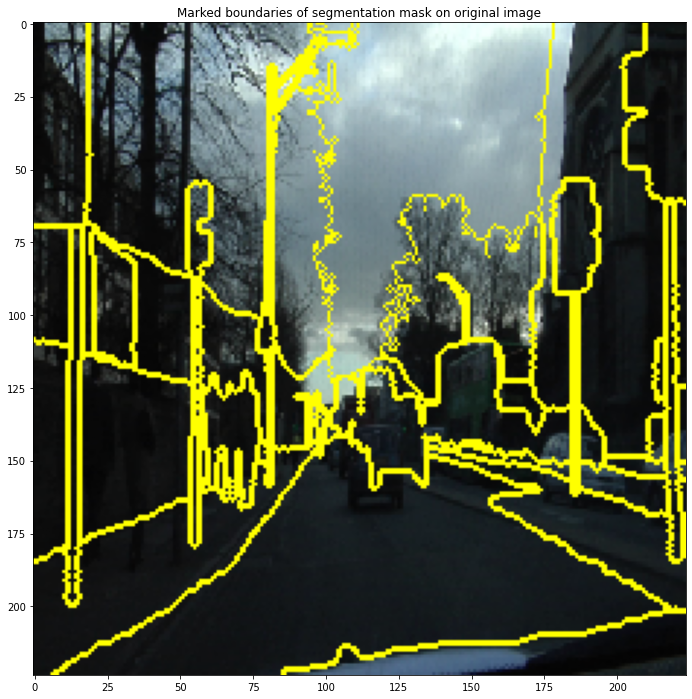

In [14]:
plt.figure(figsize = (12,12))
#plt.subplot(1, 1, 1)
plt.imshow(mark_boundaries(image, im_true))
plt.title('Marked boundaries of segmentation mask on original image')
plt.show()

In [15]:
train_idx, val_idx, anot_train_idx, anot_val_idx= train_test_split(
    train_images, train_labels, random_state=2019, test_size=0.2
)
print('Train Images Shape: ',train_idx.shape)
print('Train labels Shape: ',anot_train_idx.shape)
print('Val Images Shape: ',val_idx.shape)
print('Val labels Shape: ',anot_val_idx.shape)

Train Images Shape:  (293, 224, 224, 3)
Train labels Shape:  (293, 224, 224)
Val Images Shape:  (74, 224, 224, 3)
Val labels Shape:  (74, 224, 224)


In [16]:
anot_train_idxx=np.expand_dims(anot_train_idx,-1)
anot_val_idxx=np.expand_dims(anot_val_idx,-1)
print('Train Images Shape: ',train_idx.shape)
print('Train labels Shape: ',anot_train_idxx.shape)
print('Val Images Shape: ',val_idx.shape)
print('Val labels Shape: ',anot_val_idxx.shape)

Train Images Shape:  (293, 224, 224, 3)
Train labels Shape:  (293, 224, 224, 1)
Val Images Shape:  (74, 224, 224, 3)
Val labels Shape:  (74, 224, 224, 1)


##Generator & Data Augmentation

In [17]:
import random
def pre_processing(img):
    # Random exposure and saturation (0.9 ~ 1.1 scale)
    rand_s = random.uniform(0.9, 1.1)
    rand_v = random.uniform(0.9, 1.1)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    tmp = np.ones_like(img[:, :, 1]) * 255
    img[:, :, 1] = np.where(img[:, :, 1] * rand_s > 255, tmp, img[:, :, 1] * rand_s)
    img[:, :, 2] = np.where(img[:, :, 2] * rand_v > 255, tmp, img[:, :, 2] * rand_v)

    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

    # Centering helps normalization image (-1 ~ 1 value)
    return img / 127.5 - 1

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Get ImageDataGenerator arguments - (train, val & annotations)
# train_idx, val_idx, anot_train_idx, anot_val_idx
#def get_data_gen_args(mode):
def get_data_gen_args(train_idx, val_idx, anot_train_idxx, anot_val_idxx):
  TARGET_SIZE = (224,224)
  SEED=42
  BATCH_SIZE=32
  x_data_gen_args = dict(shear_range=0.4,
                            #preprocessing_function=pre_processing,
                            #rescale=1./255,
                            #featurewise_center=False,
                            #featurewise_std_normalization=True,
                            zoom_range=0.15,
                            rotation_range=90,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            fill_mode='reflect',
                            horizontal_flip=True,
                            vertical_flip=True)
  img_data_generator = ImageDataGenerator(**x_data_gen_args)
  img_data_generator.fit(train_idx, augment=True, seed=SEED)
  img_x_data_generator = img_data_generator.flow(train_idx, seed=SEED)
  #f_img_x_generator = img_x_data_generator.flow_from_directory('data/images',class_mode=None,seed=SEED)
  val_x_data_generator= img_data_generator.flow(val_idx, seed=SEED)
  #f_val_x_data_generator = val_x_data_generator.flow_from_directory('data/images',class_mode=None,seed=SEED)

  y_data_gen_args = dict(shear_range=0.4,
                            #rescale=1,
                            #featurewise_center=False,
                            #featurewise_std_normalization=True,
                            zoom_range=0.15,
                            rotation_range=90,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            fill_mode='reflect',
                            horizontal_flip=True,
                            vertical_flip=True)
  img_label_generator = ImageDataGenerator(**y_data_gen_args)
  img_label_generator.fit(anot_train_idxx+(1,), augment=True, seed=SEED)
  #f_img_y_data_generator = img_y_data_generator.flow_from_directory('data/masks',class_mode=None,seed=SEED)
  img_y_data_generator=img_label_generator.flow(anot_train_idxx, seed=SEED)
  val_y__data_generator=img_label_generator.flow(anot_val_idxx, seed=SEED)
  #f_val_y__data_generator =  val_y__data_generator.flow_from_directory('data/masks',class_mode=None,seed=SEED)

  def combine_gens(genx, geny):
    while True:
      yield(next(genx), next(geny))
  
  #train_generator= combine_gens(f_img_x_generator,  img_y_data_generator)
  train_generator= combine_gens(img_x_data_generator,  img_y_data_generator)
  val_generator = combine_gens(val_x_data_generator, val_y__data_generator)

  return train_generator, val_generator


In [32]:
train_generator1,val_generator1 = get_data_gen_args(train_idx, val_idx, anot_train_idxx, anot_val_idxx)


##Training

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback
import joblib

In [21]:
def model_training(model,train_generator, val_generator,model_name):
    BATCH_SIZE=32
    EPOCHS = 30
    #TRAIN_STEPS = 4*(len(train_idx))//BATCH_SIZE
    #VALID_STEPS = 4*(len(val_idx))//BATCH_SIZE
    TRAIN_STEPS = (len(train_idx))//BATCH_SIZE
    VALID_STEPS = (len(val_idx))//BATCH_SIZE
    lr_c=ReduceLROnPlateau(monitor='val_acc', patience=2, factor=0.5, verbose=1, min_lr=1e-5, mode='max')
    stp=EarlyStopping(monitor='val_acc', patience=2, verbose=1)
    checkpoints = ModelCheckpoint('/content/drive/MyDrive/CV/Notebooks/assign3/test_folder/model' + str(model_name)+'.h5' , verbose=1, save_weights_only=True)
    #ReduceLROnPlateau(monitor='val_acc', patience=2, factor=0.5, verbose=1, min_lr=1e-5, mode='max'),
    #EarlyStopping(monitor='val_acc', patience=2, verbose=1)
    
    #Training
    training = model.fit_generator(
    train_generator,
    steps_per_epoch=TRAIN_STEPS,
    validation_data=val_generator,
    validation_steps= VALID_STEPS,
    epochs=EPOCHS,
    callbacks=[checkpoints, lr_c, stp])
    joblib.dump(model, '/content/drive/MyDrive/CV/Notebooks/assign3/test_folder/model_' + str(model_name) +'.pkl', compress=1)
    joblib.dump(training, '/content/drive/MyDrive/CV/Notebooks/assign3/test_folder/training_' + str(model_name) +'.pkl', compress=1)
    return training

#**ARCHITECTURES**



1.   ## **UNET-RESNET50**


Unet baseline and ResNet50 backbone with transfer learning.

94601216/94592056 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                           

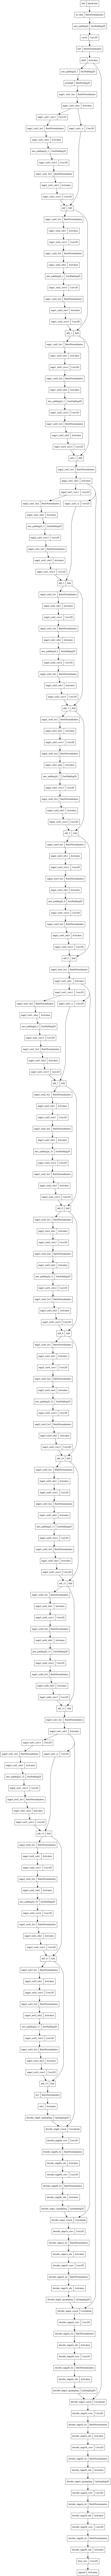

In [22]:
model1 = sm.Unet(
    'resnet50', 
    classes=12,
    encoder_weights='imagenet',
    encoder_freeze=True
    )
model1.compile(optimizer='Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])
model1.summary()
plot_model(model1)

In [23]:
model_name1='Unet_Resnet50'
train_1 = model_training(model1, train_generator1, val_generator1, model_name1)
print("Trained "+model_name1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: -0.3836 - iou_score: 1.0058 - Accuracy: 0.0309
Epoch 1: saving model to /content/drive/MyDrive/CV/Notebooks/assign3/test_folder/modelUnet_Resnet50.h5
9/9 [==============================] - 31s 1s/step - loss: -0.3836 - iou_score: 1.0058 - Accuracy: 0.0309 - val_loss: -54.8563 - val_iou_score: 2.6048 - val_Accuracy: 0.4196 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: -3.2368 - iou_score: 1.5104 - Accuracy: 0.0250
Epoch 2: saving model to /content/drive/MyDrive/CV/Notebooks/assign3/test_folder/modelUnet_Resnet50.h5
9/9 [==============================] - 9s 852ms/step - loss: -3.2368 - iou_score: 1.5104 - Accuracy: 0.0250 - val_loss: -284.7763 - val_iou_score: 3.1017 - val_Accuracy: 0.8461 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: -5.9573 - iou_score: 1.9684 - Accuracy: 0.0053
Epoch 3: saving model to /content/drive/MyDrive/CV/Notebooks/assign3/test_fold

##Quantitive Analysis

Graphs...

In [24]:
  #Graphs
def plot_graphs(training):
    plt.figure(figsize=(8, 8))
    plt.title("Loss Curve")
    plt.plot(training.history["loss"], label="loss")
    plt.plot(training.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(training.history["val_loss"]), np.min(training.history["val_loss"]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend();
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.title("Accuracy Plot")
    plt.plot(training.history["Accuracy"], label="Accuracy")
    plt.plot(training.history["val_Accuracy"], label="val_Accuracy")
    plt.plot( np.argmax(training.history["val_Accuracy"]), np.max(training.history["val_Accuracy"]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend();
    plt.show()

    plt.figure(figsize=(8, 8))
    plt.title("IOU Score Plot")
    plt.plot(training.history["iou_score"], label="iou_score")
    plt.plot(training.history["val_iou_score"], label="val_iou_score")
    plt.plot( np.argmax(training.history["val_iou_score"]), np.max(training.history["val_iou_score"]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("IOU Score")
    plt.legend();
    plt.show()

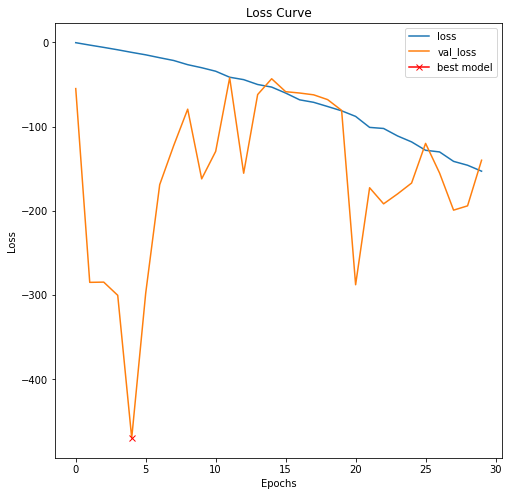

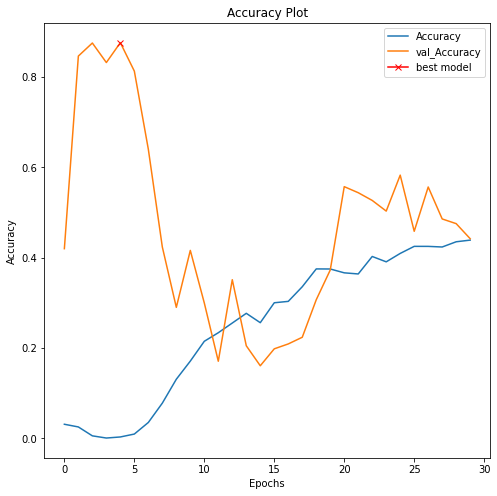

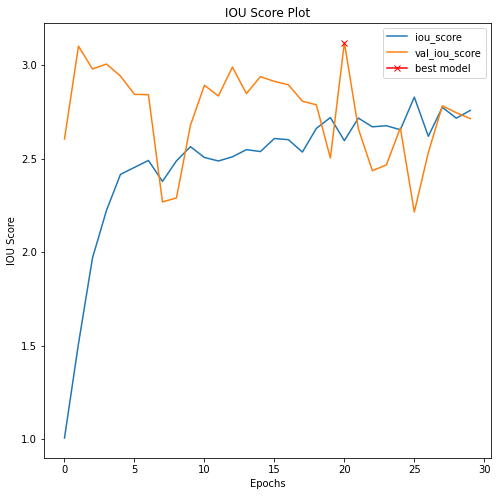

In [25]:
plot_graphs(train_1)

Custom Metrics...

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
def metric_custom(model, training, generator, y_true):
  steps=3
  y_pred = model.predict(generator, steps=steps)
  index_array = np.argmax(y_pred, axis=-1)
  y_pred=np.take_along_axis(y_pred, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
  y_true=y_true[:len(y_pred)]

  #Dice_coeff
  smooth = 1
  y_true_f = y_true.flatten()
  y_pred_f = np.round(y_pred.flatten()).astype(int)
  intersection = np.sum(y_true_f * y_pred_f)
  dc_coeff=(2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)
  #print("dice_coeff"+ dc_coeff)
  print("dice_coeff: {:.0f}".format(dc_coeff))
  print("dice_coeff_loss: {:.2f}" .format(-dc_coeff))

  #finding Accuracy
  print('Accuracy', np.mean(training.history["val_Accuracy"]))

  #F1-SCore
  print('F1-Score : {:.2f}' .format(f1_score(y_true_f, y_pred_f, average='micro')))

  #for finding sensitivity and specificity
  c = confusion_matrix(y_true_f, y_pred_f)
  tot=np.sum(c)
  print('Sensitivity : {:.2f}' .format((c[0,0]/(c[0,0]+c[0,1]))))
  print('Specificity : {:.2f}'.format(c[1,1]/(c[1,0]+c[1,1] )))

In [27]:
metric_custom(model1, train_1, train_idx, anot_train_idxx)

dice_coeff: 1
dice_coeff_loss: -1.50
Accuracy 0.46847052524487176
F1-Score : 0.24
Sensitivity : 0.00
Specificity : 1.00


##Qualitative Analysis

Images...

In [28]:
import PIL
from PIL import Image
from PIL import ImageOps
def image_analy(model, training, generator, y_true,x):
  test_img = generator[x]
  ground_truth=y_true[x]
  test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img_norm, 0)
  prediction = (model.predict(generator))

  mask = np.argmax(prediction[x], axis=-1)
  mask = np.expand_dims(mask, axis=-1)
  img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))

  plt.figure(figsize = (15,15))

  plt.subplot(1, 5, 1)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,0], cmap='gray')

  plt.subplot(1, 5, 2)
  plt.title('Masked Image')
  plt.imshow(ground_truth[:,:,0], cmap='nipy_spectral')


  plt.subplot(1, 5, 3)
  plt.title('Prediction on test image')
  plt.imshow(img, cmap='nipy_spectral')


  plt.subplot(1, 5, 4)
  plt.imshow(mark_boundaries(test_img[:,:,0], ground_truth[:,:,0]))
  plt.title('label mask/image')

  plt.subplot(1, 5, 5)
  imgg = np.asanyarray(img)
  plt.imshow(mark_boundaries(test_img[:,:,0], imgg))
  plt.title('pred mask/image')
  plt.show()




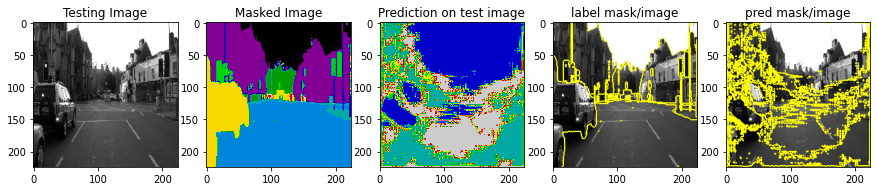

In [ ]:
x=2
image_analy(model1, train_1, train_idx, anot_train_idxx,x)

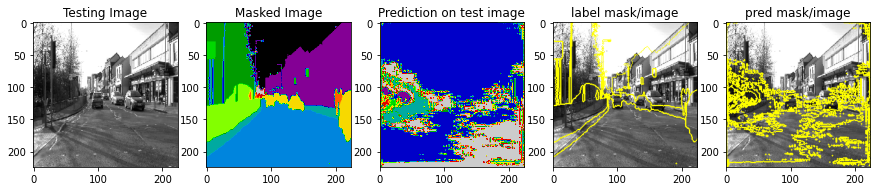

In [ ]:
x=25
image_analy(model1, train_1, train_idx, anot_train_idxx,x)

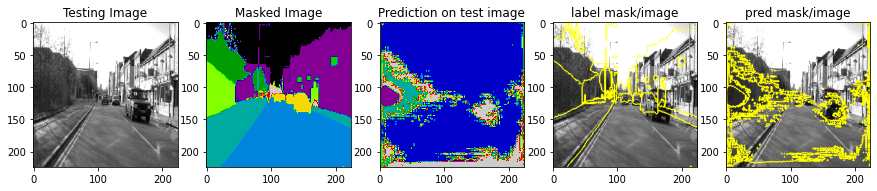

In [ ]:
x=54
image_analy(model1, train_1, train_idx, anot_train_idxx,x)

#Enhancing baseline with 2nd Architecture



1.   ## **UNET-EfficientNet**


Unet baseline and EfficientNet backbone with transfer learning.

115523584/115515256 [==============================] - 5s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   1296        ['input_1[0][0]']                
                                48)                                                               
                                                                                                  
 stem_bn (BatchNormalization)   (None, None, None,   192         ['stem_conv[0][0]']              
                         

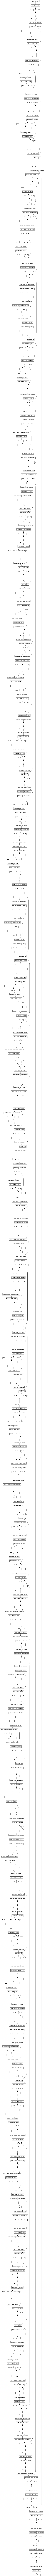

In [29]:
model2 = sm.Unet(
    'efficientnetb5', 
    classes=12,
    encoder_weights='imagenet',
    encoder_freeze=True
    )
model2.compile(optimizer=Adam(0.0001), loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])
model2.summary()
plot_model(model2)

In [33]:
model_name2='Unet_EfficientNet'
train_2 = model_training(model2, train_generator1, val_generator1, model_name2)
print("Trained "+model_name2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: -8.4712 - iou_score: 1.9800 - Accuracy: 9.7006e-04
Epoch 1: saving model to /content/drive/MyDrive/CV/Notebooks/assign3/test_folder/modelUnet_EfficientNet.h5
9/9 [==============================] - 12s 1s/step - loss: -8.4712 - iou_score: 1.9800 - Accuracy: 9.7006e-04 - val_loss: -19.3708 - val_iou_score: 2.5157 - val_Accuracy: 0.0426 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: -8.9214 - iou_score: 2.0237 - Accuracy: 9.7733e-04
Epoch 2: saving model to /content/drive/MyDrive/CV/Notebooks/assign3/test_folder/modelUnet_EfficientNet.h5
9/9 [==============================] - 11s 1s/step - loss: -8.9214 - iou_score: 2.0237 - Accuracy: 9.7733e-04 - val_loss: -23.3269 - val_iou_score: 2.6305 - val_Accuracy: 0.0754 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: -9.4889 - iou_score: 2.0430 - Accuracy: 0.0013
Epoch 3: saving model to /content/drive/MyDrive/C

##Quantitative Measures

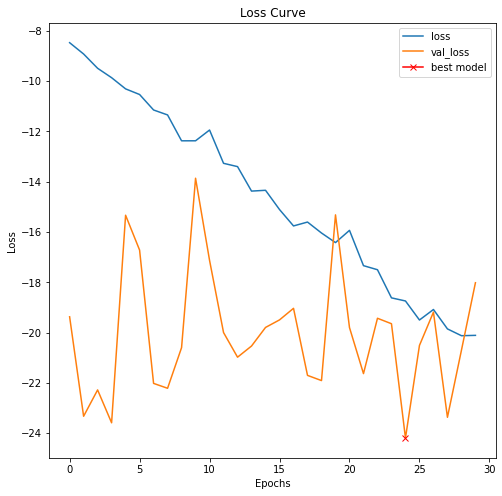

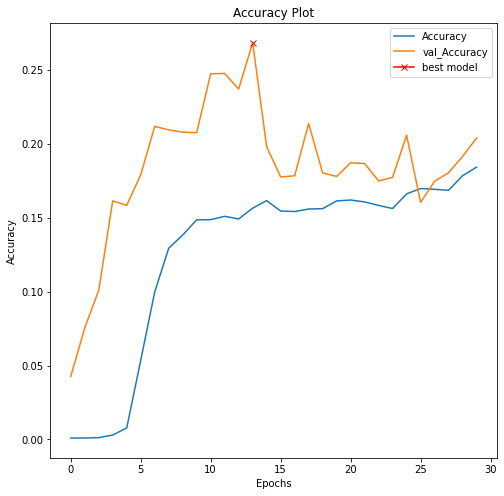

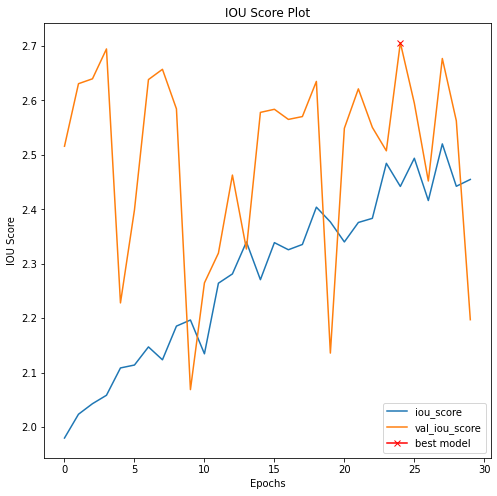

In [34]:
plot_graphs(train_2)

In [35]:
metric_custom(model2, train_2, train_idx, anot_train_idxx)

dice_coeff: 1
dice_coeff_loss: -1.50
Accuracy 0.18414899421234926
F1-Score : 0.24
Sensitivity : 0.00
Specificity : 1.00


##Qualitative Measures

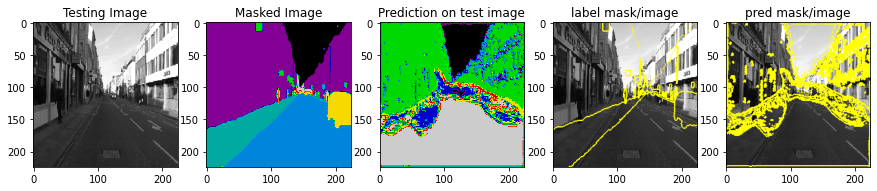

In [36]:
x=80
image_analy(model2, train_2, train_idx, anot_train_idxx,x)

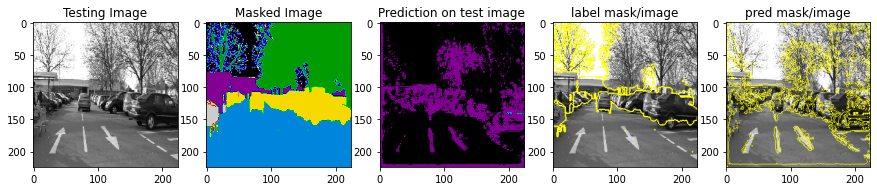

In [ ]:
x=66
image_analy(model2, train_2, train_idx, anot_train_idxx,x)

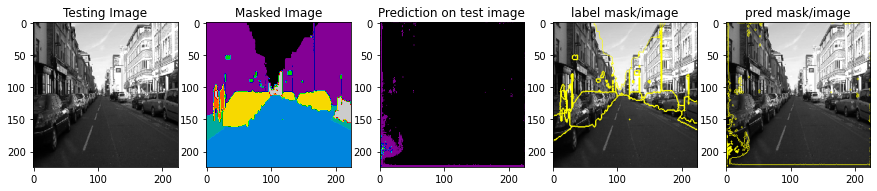

In [ ]:
x=200
image_analy(model2, train_2, train_idx, anot_train_idxx,x)